In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Preprocessing and EDA


In [2]:
macro = pd.read_csv('data/macro.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   timestamp                                   2484 non-null   object 
 1   oil_urals                                   2484 non-null   float64
 2   gdp_quart                                   2394 non-null   float64
 3   gdp_quart_growth                            2394 non-null   float64
 4   cpi                                         2453 non-null   float64
 5   ppi                                         2453 non-null   float64
 6   gdp_deflator                                2119 non-null   float64
 7   balance_trade                               2453 non-null   float64
 8   balance_trade_growth                        2394 non-null   float64
 9   usdrub                                      2481 non-null   float64
 10  eurrub     

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [5]:
train.dtypes

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object

In [6]:
train.nunique()

id                    30471
timestamp              1161
full_sq                 211
life_sq                 175
floor                    41
                      ...  
mosque_count_5000         3
leisure_count_5000      107
sport_count_5000        216
market_count_5000        22
price_doc              9296
Length: 292, dtype: int64

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30471.0,1.523792e+04,8.796502e+03,1.0,7620.5,15238.0,22855.5,30473.0
full_sq,30471.0,5.421427e+01,3.803149e+01,0.0,38.0,49.0,63.0,5326.0
life_sq,24088.0,3.440327e+01,5.228573e+01,0.0,20.0,30.0,43.0,7478.0
floor,30304.0,7.670803e+00,5.319989e+00,0.0,3.0,6.5,11.0,77.0
max_floor,20899.0,1.255897e+01,6.756550e+00,0.0,9.0,12.0,17.0,117.0
...,...,...,...,...,...,...,...,...
mosque_count_5000,30471.0,4.424207e-01,6.092689e-01,0.0,0.0,0.0,1.0,2.0
leisure_count_5000,30471.0,8.648814e+00,2.058074e+01,0.0,0.0,2.0,7.0,106.0
sport_count_5000,30471.0,5.279659e+01,4.629266e+01,0.0,11.0,48.0,76.0,218.0
market_count_5000,30471.0,5.987070e+00,4.889219e+00,0.0,1.0,5.0,10.0,21.0


In [8]:
test

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,81,28,1,1,8,39,2,3,75,12
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,1,2,1,0,0,10,0,0,0,0
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,636,371,141,26,150,249,2,105,203,13
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,16,7,2,0,5,11,0,2,43,10


In [9]:
macro

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def plot_dist(x,bins = 20):
    plt.figure(figsize=(8, 5))
    sns.histplot(train[x], bins=bins, kde=True, color="royalblue", alpha=0.6)
    
    # Labels
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {x}")
    plt.show()

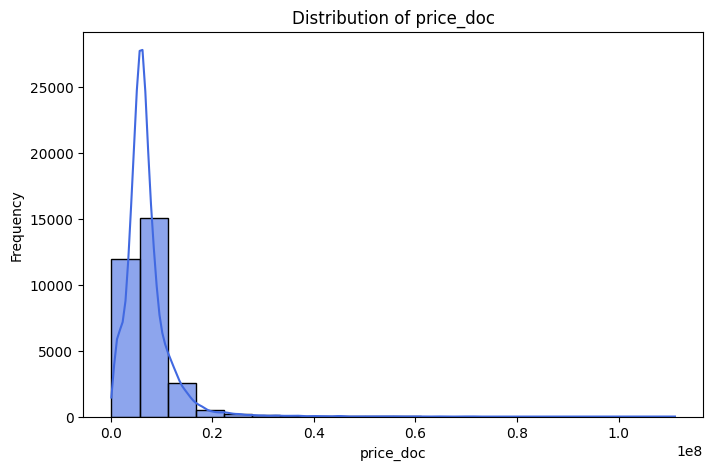

In [11]:
plot_dist('price_doc')

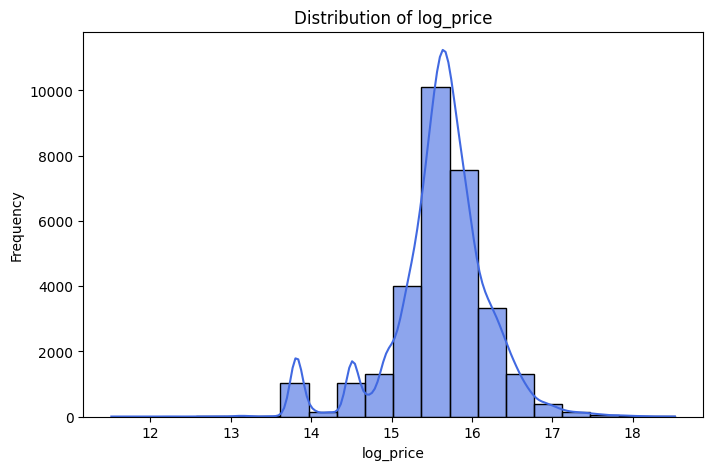

In [12]:
#log transform the target
train['log_price'] = np.log(train['price_doc'])
plot_dist('log_price')

## 1.1 Time series EDA + Pre-processing


Time Series Analysis - I think it is worth checking the time-dependent structure of the target feature since it can help with the overall results if I can recognize trends/patterns in house prices.
 - predicting the daily volume of sales can help assessing how prices change over time
 - There is a growing trend in prices which should be incorporated in the prediction since we have to predict for 11 months forward
 - Price changes are not auto-correlated
 - Volatility clustering is present but i think it will not be very useful to model volatility for predicting individual sales -- also this can be due to the different number of daily sales ->higher transaction number causes higher volatility

 - According to adf and kpss test the series is stationary, but might have a stochastic trend since kpss rejected null hypothesis of trend-stationarity 
 - However there seems to be a strong linear trend aswell- OLS with - R**2 = 0.82
 - I will use the linear trend as a feature of time and will continue with cross-sectional analysis


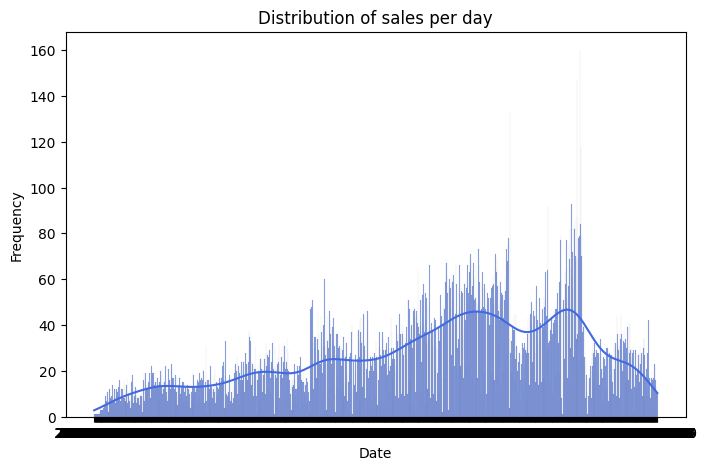

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(train['timestamp'], bins=30, kde=True, color="royalblue", alpha=0.6)

# Labels
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title(f"Distribution of sales per day")
plt.show()

In [14]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#sort train data and convert timestamps to numeric

train['timestamp'] = pd.to_datetime(train['timestamp'])
train_sorted = train.sort_values("timestamp")
start_date = train_sorted["timestamp"].min()
train_sorted["timestamp_numeric"] = (train_sorted["timestamp"] - start_date).dt.days

#fit moving average and HP filter to show non-linear trend
train_sorted["log_price_ma"] = train_sorted["log_price"].rolling(window=365, min_periods=1).mean()
cycle, trend = hpfilter(train_sorted["log_price"], lamb=250000000)  #suggested lambda for daily data

#sort test data
test["timestamp"] = pd.to_datetime(test["timestamp"])
test_sorted = test.sort_values("timestamp")
test_sorted["timestamp_numeric"] = (test_sorted["timestamp"] - start_date).dt.days

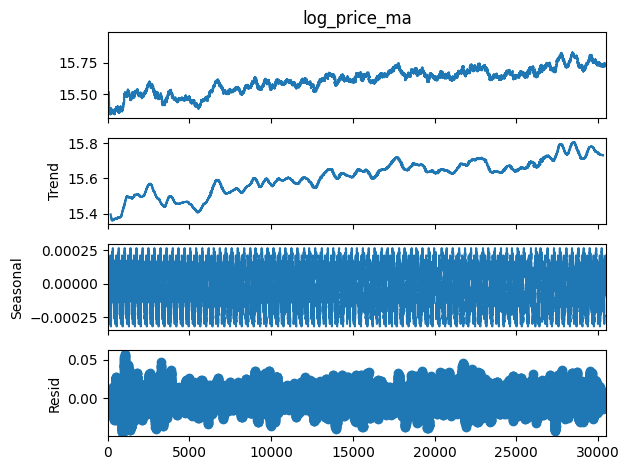

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(train_sorted['log_price_ma'], model='additive', period=365)  # period=365 for yearly seasonality

# Plot the decomposition
decomposition.plot()
plt.show()

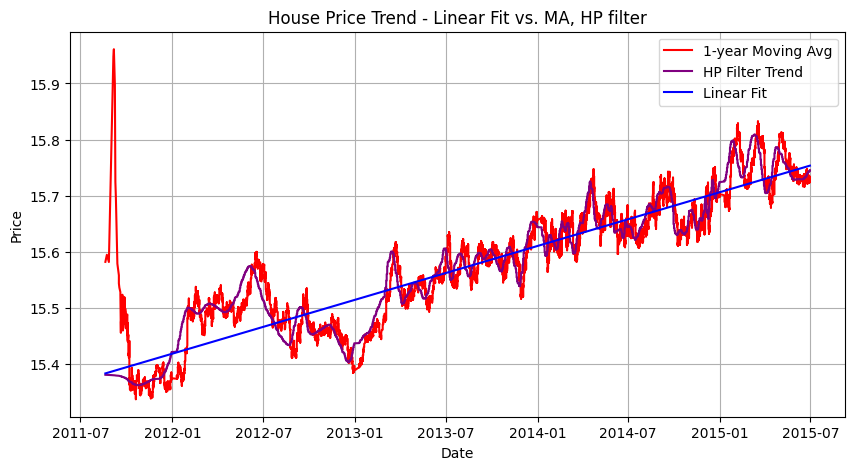

Slope: 0.00026265426781993135, Intercept: 15.383120369851532
R-squared: 0.820765813188223
Mean Squared Error: 0.0017116288719465204


In [16]:
from sklearn.linear_model import LinearRegression

# Reshape the data for the linear regression model
X = train_sorted['timestamp_numeric'].values.reshape(-1, 1)
y = train_sorted['log_price_ma'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)


# Save slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# Predict using the fitted model
y_pred = model.predict(X)

# Plot the original data and the fitted linear regression line
plt.figure(figsize=(10, 5))
plt.plot(train_sorted["timestamp"], train_sorted["log_price_ma"], color="red", label="1-year Moving Avg")
plt.plot(train_sorted["timestamp"], trend, color="purple", label="HP Filter Trend")
plt.plot(train_sorted["timestamp"], y_pred, color="blue", label="Linear Fit")

plt.title("House Price Trend - Linear Fit vs. MA, HP filter")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients of the linear model
print(f"Slope: {slope}, Intercept: {intercept}")

# R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

In [17]:
#add trend feature to data
start_date = train["timestamp"].min()
train["timestamp_numeric"] = (train["timestamp"] - start_date).dt.days

test["timestamp"] = pd.to_datetime(test["timestamp"])
test["timestamp_numeric"] = (test["timestamp"] - start_date).dt.days

train['trend_feature'] = train['timestamp_numeric'] * slope + intercept
test['trend_feature'] = test['timestamp_numeric'] * slope + intercept
#drop supplemental columns
train = train.drop(columns='timestamp_numeric')
test = test.drop(columns='timestamp_numeric')

<Figure size 1000x400 with 0 Axes>

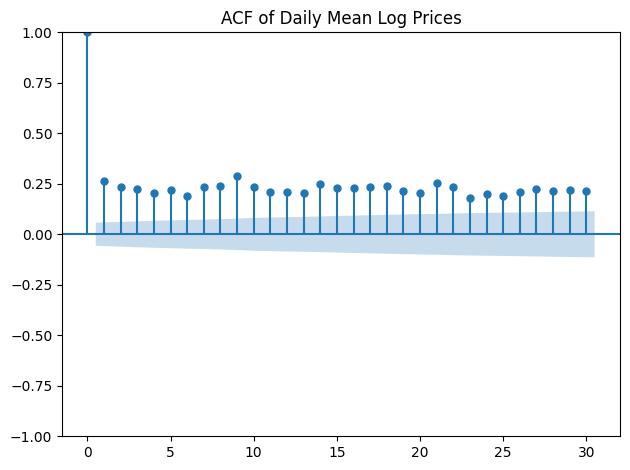

<Figure size 1000x400 with 0 Axes>

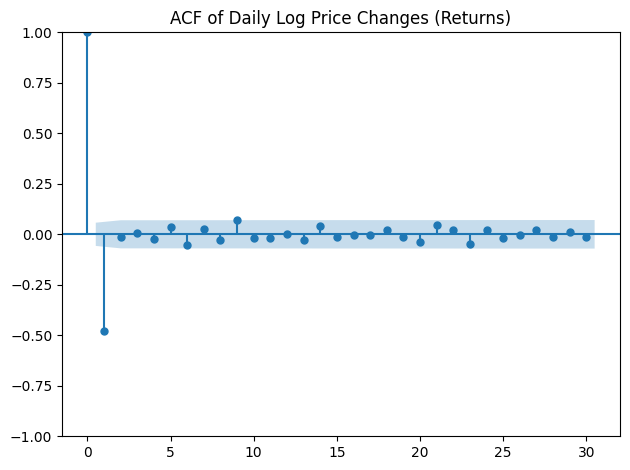

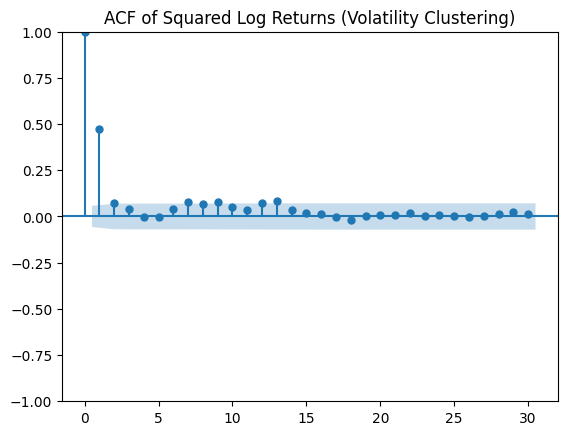

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
daily_log_price = train.groupby('timestamp')['log_price'].mean()

# Plot ACF of log prices
plt.figure(figsize=(10, 4))
plot_acf(daily_log_price, lags=30)
plt.title("ACF of Daily Mean Log Prices")
plt.tight_layout()
plt.show()

# Optionally, also check ACF of daily returns
daily_returns = daily_log_price.diff().dropna()

plt.figure(figsize=(10, 4))
plot_acf(daily_returns, lags=30)
plt.title("ACF of Daily Log Price Changes (Returns)")
plt.tight_layout()
plt.show()

# Plot ACF of squared returns
plot_acf(daily_returns**2, lags=30)
plt.title("ACF of Squared Log Returns (Volatility Clustering)")
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(time_series):
    adf_result = adfuller(time_series)
    print("ADF Test Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    if adf_result[1] < 0.05:
        print("Conclusion: The series is stationary (reject null hypothesis).")
    else:
        print("Conclusion: The series is non-stationary (accept null hypothesis).")

# KPSS Test
def kpss_test(time_series):
    kpss_result = kpss(time_series, regression= 'ct', nlags=10)
    print("KPSS Test Statistic:", kpss_result[0])
    print("p-value:", kpss_result[1])
    if kpss_result[1] > 0.05:
        print("Conclusion: The series is trend-stationary (accept null hypothesis).")
    else:
        print("Conclusion: The series is non-stationary(reject null hypothesis).")


adf_test(train['log_price'])
kpss_test(train['log_price'])

ADF Test Statistic: -15.598608051541664
p-value: 1.8413390618545176e-28
Conclusion: The series is stationary (reject null hypothesis).
KPSS Test Statistic: 0.5236711956770449
p-value: 0.01
Conclusion: The series is non-stationary(reject null hypothesis).


C:\Users\Dell\AppData\Local\Temp\ipykernel_18040\1523569893.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(time_series, regression= 'ct', nlags=10)


## 1.2 Cross-sectional EDA + Preprocessing
Missing data:

 - for macro dataset most missing data is not missing at random -- they are missing for the test period. Imputing those missing values would dampen the predictive effect of these variables, it would be overfitting on train. 
 - I will use only those values that are mostly or somewhat present in the test period aswell
 - Some features in train data that are most correlated with the target are missing with a relatively large percent, imputation technique will be important 
analyze type of missing data -- how is it missing
 - Using PCA to get a 1-dimensional macro data that I can add to my model. 8 Principal Component explain over 90% of variance in data
   

Clean and impute the macro dataset

Text(0.5, 0, 'Column Number')

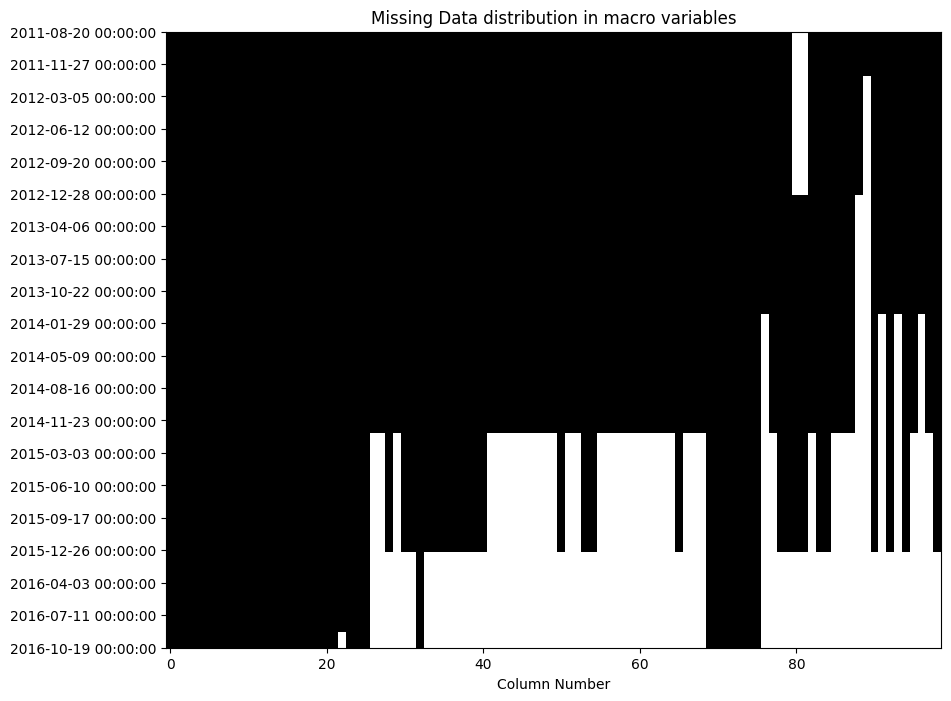

In [20]:
#change start date to the start date of traind data
macro = macro[macro['timestamp'] >= '2011-08-20']
macro = macro[macro['timestamp'] <= '2016-10-19']
#convert to datetime and set index
macro['timestamp'] = pd.to_datetime(macro['timestamp'])
macro = macro.reset_index()
macro = macro.set_index('timestamp')
macro = macro.drop(columns = ['index'],axis=1)
#plot missing data
plt.figure(figsize=(10, 8))
plt.imshow(macro.isna(), aspect="auto", interpolation="nearest", cmap="gray")
# Show selected datetime labels on y-axis to avoid clutter
plt.yticks(
    ticks=np.linspace(0, len(macro.index) - 1, 20, dtype=int),
    labels=macro.index[np.linspace(0, len(macro.index) - 1, 20, dtype=int)]
)

plt.title('Missing Data distribution in macro variables')
plt.xlabel("Column Number")

In [21]:
# Count missing values in train
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

Missing values:
 hospital_beds_raion                      0.473926
build_year                               0.446490
state                                    0.444980
cafe_sum_500_max_price_avg               0.435857
cafe_sum_500_min_price_avg               0.435857
cafe_avg_price_500                       0.435857
max_floor                                0.314135
material                                 0.314135
num_room                                 0.314135
kitch_sq                                 0.314135
preschool_quota                          0.219487
school_quota                             0.219389
cafe_avg_price_1000                      0.214105
cafe_sum_1000_max_price_avg              0.214105
cafe_sum_1000_min_price_avg              0.214105
life_sq                                  0.209478
raion_build_count_with_builddate_info    0.163795
build_count_after_1995                   0.163795
build_count_1946-1970                    0.163795
build_count_1921-1945            

Text(0, 0.5, 'record number')

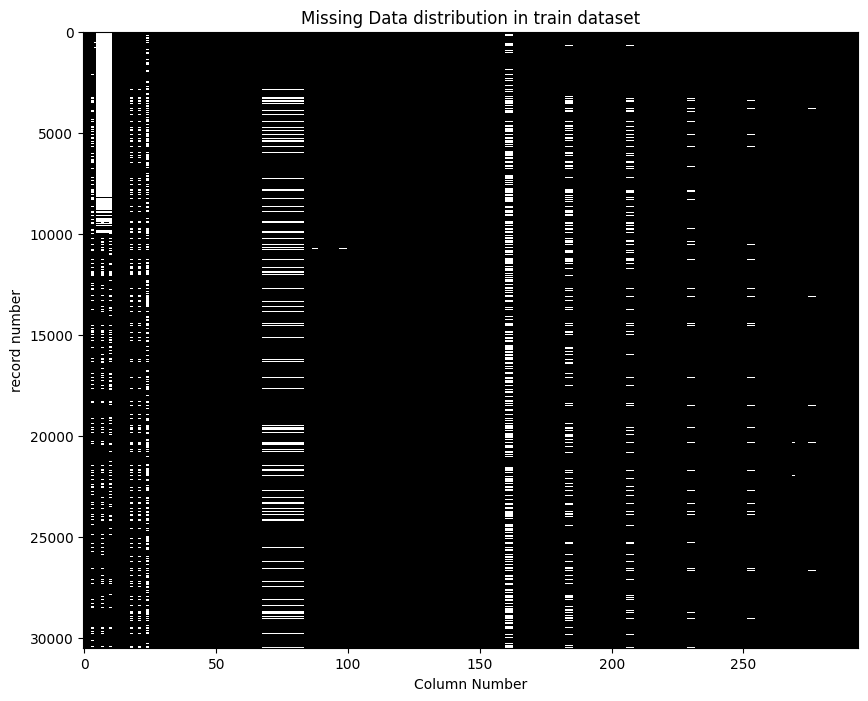

In [22]:

plt.figure(figsize=(10, 8))
plt.imshow(train.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.title('Missing Data distribution in train dataset')
plt.xlabel("Column Number")
plt.ylabel("record number")

Text(0, 0.5, 'record number')

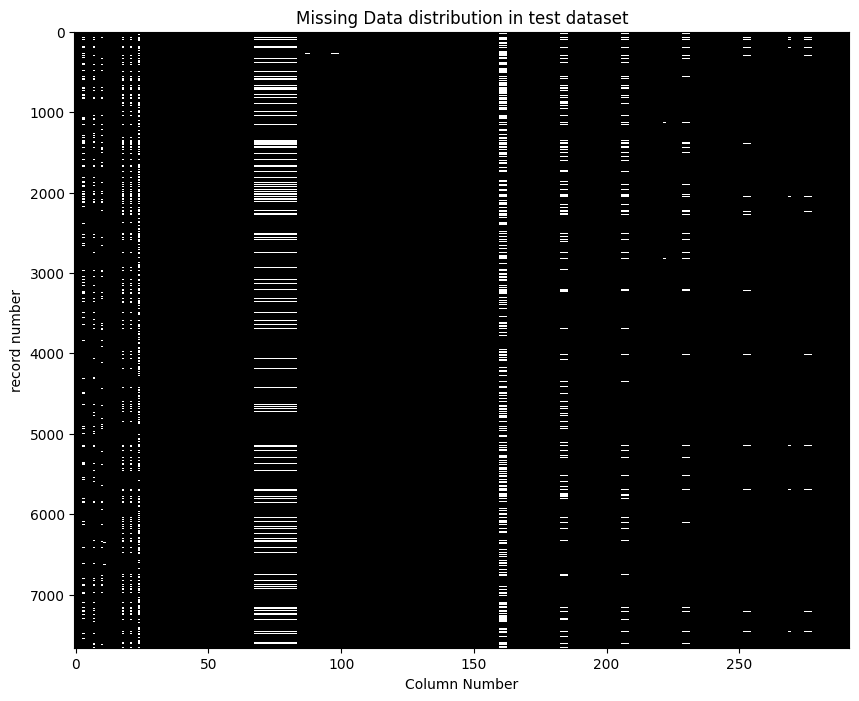

In [23]:

plt.figure(figsize=(10, 8))
plt.imshow(test.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.title('Missing Data distribution in test dataset')
plt.xlabel("Column Number")
plt.ylabel("record number")

In [24]:
#drop cols with too much missing values
target =  train['log_price']
train= train.drop(columns = ['price_doc','log_price','id'],axis=1)
test = test.set_index('id')

missing_percent = train.isnull().sum()/len(train)
#missing_percent = missing_percent[missing_percent< 0.40]
# Select only numeric features


#train = train[missing_percent.index]
#test = test[missing_percent.index]

In [25]:

num_cols =train.select_dtypes(include=['float','int64' ]).columns
cat_cols = train.select_dtypes(include = 'object').columns
correlations = train[num_cols].corrwith(target).sort_values(ascending=False)
print(correlations.head(10))
correlations.tail(10)

num_room               0.427693
full_sq                0.271407
trc_count_5000         0.228143
sport_count_5000       0.223386
sport_count_3000       0.219429
sport_count_2000       0.213126
trc_sqm_5000           0.210268
sport_count_1500       0.198327
sport_objects_raion    0.196311
trc_count_3000         0.194936
dtype: float64


swim_pool_km         -0.209718
metro_min_avto       -0.212059
stadium_km           -0.217404
basketball_km        -0.219494
nuclear_reactor_km   -0.238313
bulvar_ring_km       -0.242107
kremlin_km           -0.242356
ttk_km               -0.242854
sadovoe_km           -0.246473
zd_vokzaly_avto_km   -0.248681
dtype: float64

In [26]:
correlations.head(25).index

Index(['num_room', 'full_sq', 'trc_count_5000', 'sport_count_5000',
       'sport_count_3000', 'sport_count_2000', 'trc_sqm_5000',
       'sport_count_1500', 'sport_objects_raion', 'trc_count_3000',
       'office_sqm_5000', 'trc_sqm_3000', 'school_education_centers_raion',
       'cafe_count_5000_price_1000', 'market_count_5000', 'office_sqm_3000',
       'cafe_count_5000_price_1500', 'cafe_count_5000', 'ekder_male',
       'cafe_count_5000_na_price', 'cafe_count_5000_price_500',
       'trc_count_2000', 'cafe_count_5000_price_2500', 'sport_count_1000',
       'office_sqm_2000'],
      dtype='object')

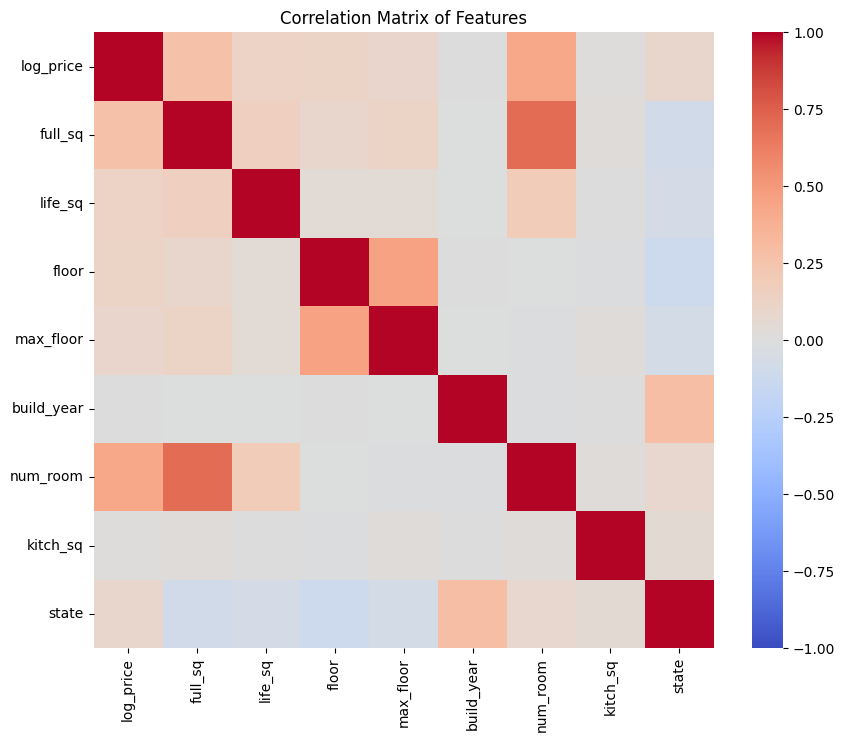

In [27]:
# variables that are internal to home
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 
                    'kitch_sq', 'state']

correlation_df = pd.concat([target, train[internal_chars]], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_df.corr(),
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    vmin=-1,   
    vmax=1    
)
plt.title("Correlation Matrix of Features")
plt.show()

Distribution of features with highest positive correlation to target


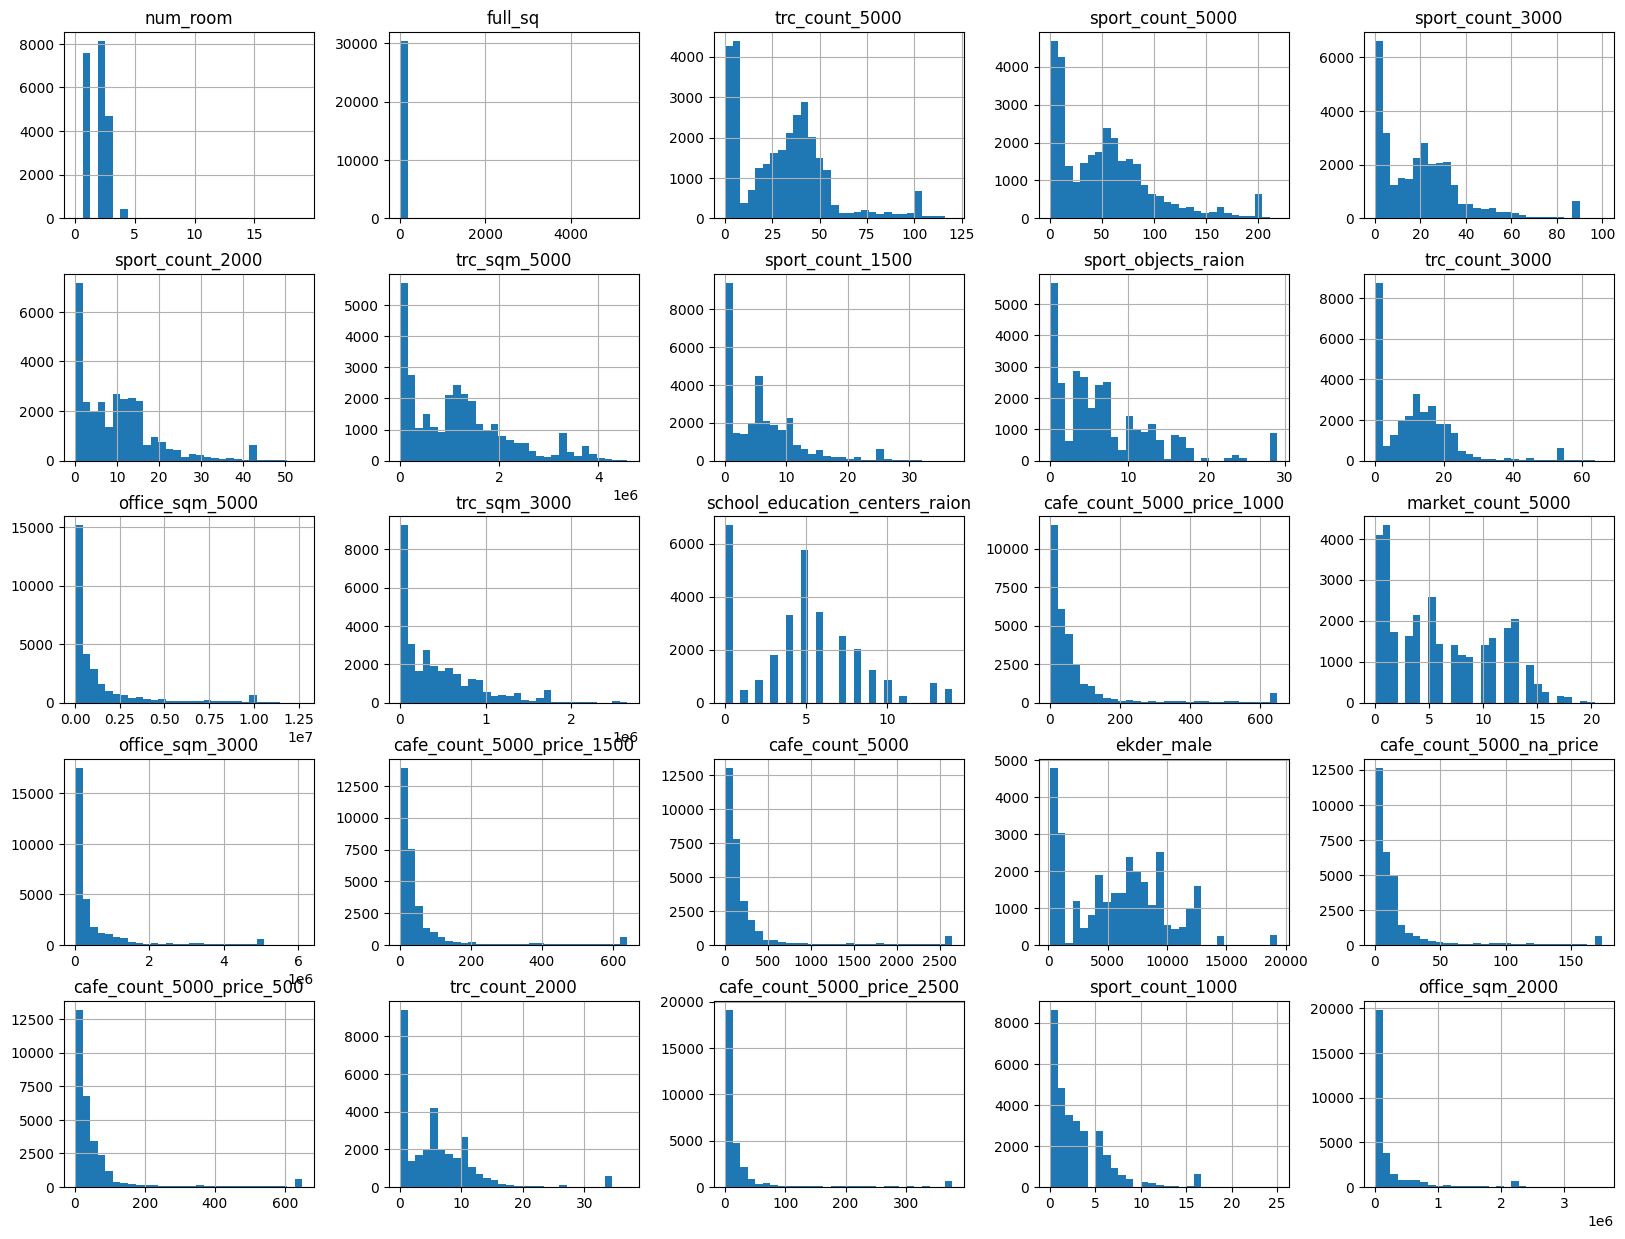

Distribution of features with highest negative correlation to target


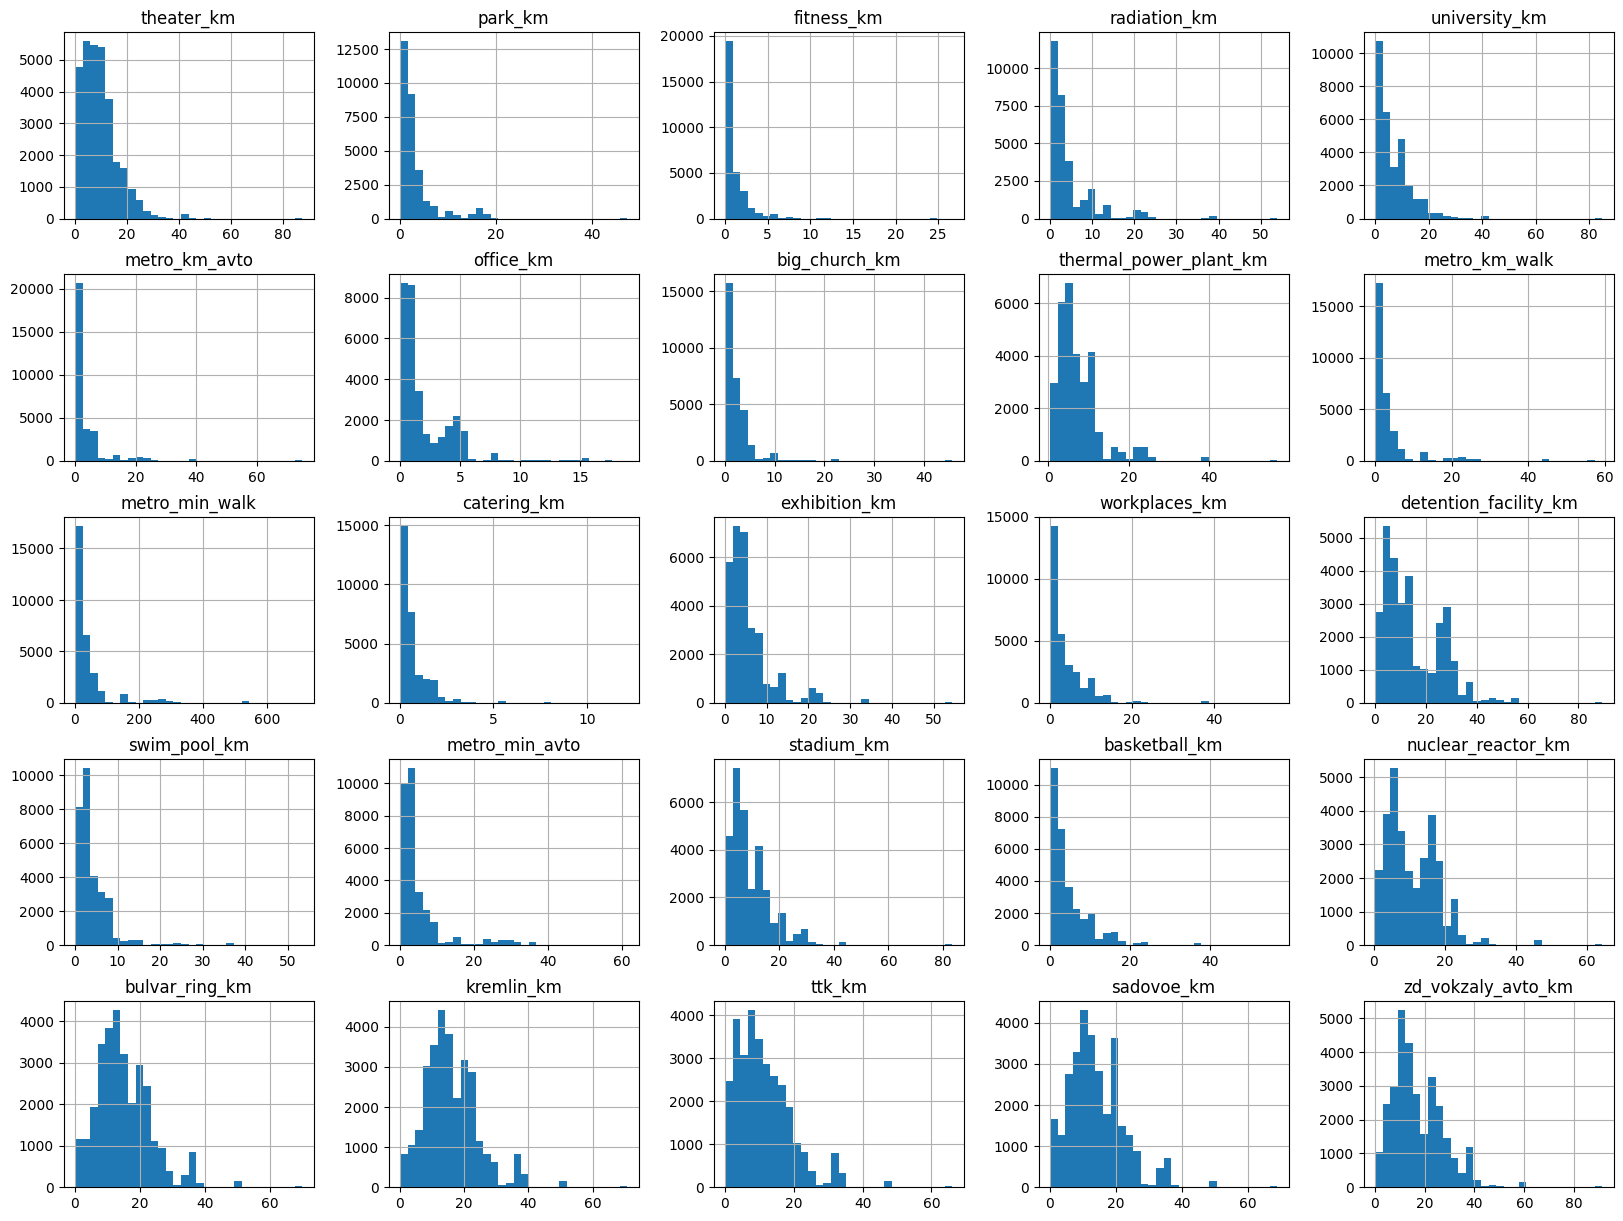

In [28]:

cols = train.select_dtypes(include='number').columns
positive_corr = correlations.head(25).index
negative_corr =correlations.tail(25).index
print('Distribution of features with highest positive correlation to target')
train[positive_corr].hist(bins=30, figsize=(20, 15))
plt.show()

print('Distribution of features with highest negative correlation to target')
train[negative_corr].hist(bins=30, figsize=(20, 15))
plt.show()

## 2 Imputation and Dimension reduction
Impute missing values for macro -- ffil + bfill on data that are present in test dataset aswell
Reduce macro feature dimensions with PCA

Simple imputation first; 
 - simple median imputer for numeric data
 - ordinal imputer for categorical (XGB splits will not be affected by the ordinal nature of the data)

Feature selection by XGB fit -- after XGB selecting features by 'gain' = most contributions to accuracy increase

Iterative imputer for reduced dimension -- using random forest to capture non-linear trends in data


In [29]:

#drop cols that have a missing ratio larger than threshold
missing_percent = macro.isnull().sum()/len(macro)
missing_percent = missing_percent[missing_percent< 0.16]
macro = macro[missing_percent.index]

#impute missing data
macro = macro.ffill()
macro = macro.bfill()


In [30]:
from sklearn.decomposition import PCA
#

#fit PCA to the whole dataset
def fit_visualize_pca(df, components):
    
    # Initialize PCA
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    features_reduced = df[num_cols]
    
    pca = PCA(n_components=components)  # Keeping all components to analyze explained variance
    
    # Fit PCA on the scaled data
    pca.fit(features_reduced)
    
    # Transform the data using PCA
    features_pca = pca.transform(features_reduced)
    
    # Explained variance by each component
    explained_variance = pca.explained_variance_ratio_
    
    # Cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance)

    print(df.head(1))
    # Plot explained variance and cumulative explained variance
    plt.figure(figsize=(12, 6))
    
    # Individual explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.title('Explained Variance per Principal Component')
    
    # Cumulative explained variance
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
    plt.ylabel('Cumulative Explained Variance')
    plt.xlabel('Principal Components')
    plt.title('Cumulative Explained Variance')
    plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    loadings = pca.components_.T
    return loadings, features_pca

            oil_urals  gdp_quart  gdp_quart_growth       cpi       ppi  \
timestamp                                                                
2011-08-20   0.798179  -1.962827          0.879621 -1.284947 -1.663392   

            gdp_deflator  balance_trade  balance_trade_growth    usdrub  \
timestamp                                                                 
2011-08-20     -2.007698       0.012692             -0.475493 -0.971967   

              eurrub  ...  rent_price_2room_eco  rent_price_1room_eco  \
timestamp             ...                                               
2011-08-20 -0.819318  ...             -0.535714             -0.581091   

            load_of_teachers_school_per_teacher  students_state_oneshift  \
timestamp                                                                  
2011-08-20                            -1.730978                -1.166496   

            provision_nurse  load_on_doctors  turnover_catering_per_cap  \
timestamp                  

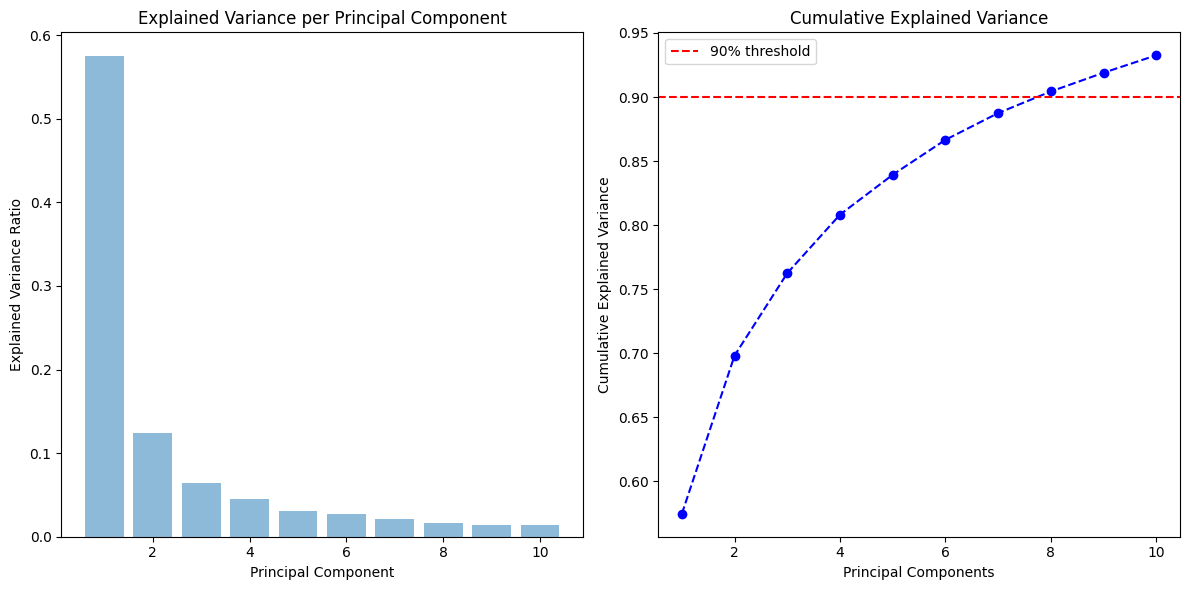

In [31]:
#standardise
scaler = StandardScaler()
macro_standard = scaler.fit_transform(macro)
macro_num_cols = macro.select_dtypes(include=['float','int64' ]).columns
macro_processed = macro.copy()
macro_processed[macro_num_cols]=macro_standard
#run pca
macro_loadings, features = fit_visualize_pca(macro_processed,10)

In [32]:
macro_pc_df = pd.DataFrame(features[:,:8])
macro_pc_df.index=macro_processed.index
macro_pc_df.columns = [f'pc_{i+1}' for i in range(macro_pc_df.shape[1])]
macro_pc_df.reset_index(inplace=True)
macro_pc_df

,timestamp,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8
0,2011-08-20,10.159983,-3.647470,0.514749,-2.120054,0.336678,2.945072,0.424391,-0.363625
1,2011-08-21,10.159983,-3.647470,0.514749,-2.120054,0.336678,2.945072,0.424391,-0.363625
2,2011-08-22,10.155686,-3.655968,0.504154,-2.124917,0.333409,2.943943,0.426468,-0.359344
3,2011-08-23,10.165350,-3.651725,0.496100,-2.122766,0.323909,2.937431,0.428930,-0.361394
4,2011-08-24,10.168220,-3.662231,0.489170,-2.124292,0.308637,2.934371,0.431175,-0.343913
...,...,...,...,...,...,...,...,...,...
1883,2016-10-15,-7.244118,-3.038280,-2.028395,-2.245602,-0.196059,-0.508654,0.437251,0.991060
1884,2016-10-16,-7.244118,-3.038280,-2.028395,-2.245602,-0.196059,-0.508654,0.437251,0.991060
1885,2016-10-17,-7.253246,-3.030373,-1.998696,-2.242737,-0.176272,-0.496410,0.430117,0.988812
1886,2016-10-18,-7.252095,-3.036368,-1.995286,-2.241425,-0.181574,-0.495761,0.429445,0.999095


## Feature Engineering

In [33]:
#Feature Engineering
# Add month-year
train['month'] = train['timestamp'].dt.month
train['year'] = train['timestamp'].dt.year

test['month'] = test['timestamp'].dt.month
test['year'] = test['timestamp'].dt.year


#merge macro PCs with train/test
train_merged = pd.merge(train, macro_pc_df, how='left', on='timestamp')
test_merged = pd.merge(test, macro_pc_df, how='left', on='timestamp')

train_timestamps = train['timestamp']
test_timestamps = test['timestamp']

train_merged.drop(columns = 'timestamp', inplace = True)
test_merged.drop(columns = 'timestamp', inplace = True)

test_merged.set_index(test.index,inplace = True)

### Initial imputation -- to reduce dimension then use better imputation

In [34]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Assuming you have already defined your columns
num_cols =train_merged.select_dtypes(include=['float','int64','int32' ]).columns
cat_cols = train_merged.select_dtypes(include = 'object').columns

# Define the preprocessing pipeline
# Define the preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ]), num_cols),
    
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ]), cat_cols)
])
# Fit-transform on train and transform on test
X_train_processed = preprocessor.fit_transform(train_merged)
X_test_processed = preprocessor.transform(test_merged)


# Combine the imputed columns
X_train  = pd.DataFrame(np.column_stack([X_train_processed]),
                                 columns=np.concatenate([num_cols, cat_cols]), 
                                 index=train_merged.index)

X_test = pd.DataFrame(np.column_stack([X_test_processed]),
                                columns=np.concatenate([num_cols, cat_cols]), 
                                index=test_merged.index)

## Dimension reduction
 - Fit XGB and selecting features based on gain

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_log_error, accuracy_score, roc_auc_score,auc, precision_recall_curve, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import optuna
import optuna.visualization as vis
import xgboost as xgb
from xgboost import XGBRegressor

In [36]:
# Define the static hyperparameters
params = {
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmsle',
    'verbosity': 1,
    'random_state': 42 
}

# Binning the target variable for StratifiedKFold
y_bins = pd.qcut(target, q=5, labels=False)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model with the static hyperparameters
model = XGBRegressor(**params)

# Arrays to store the RMSLE for train and validation
train_scores = []
val_scores = []

# Cross-validation with Stratified K-Fold
for train_idx, val_idx in skf.split(X_train, y_bins):  # Use StratifiedKFold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = target.iloc[train_idx], target.iloc[val_idx]
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # Predictions on the training set
    y_train_pred = model.predict(X_train_fold)
    train_rmsle = np.sqrt(mean_squared_log_error(y_train_fold, y_train_pred))
    train_scores.append(train_rmsle)
    
    # Predictions on the validation set
    y_val_pred = model.predict(X_val_fold)
    val_rmsle = np.sqrt(mean_squared_log_error(y_val_fold, y_val_pred))
    val_scores.append(val_rmsle)

# Print the average RMSLE for both train and validation sets across all folds
print("Average Train RMSLE:", np.mean(train_scores))
print("Average Validation RMSLE:", np.mean(val_scores))

# Train the final model on the full dataset with the static hyperparameters
model.fit(X_train, target)

Average Train RMSLE: 0.021659797894883797
Average Validation RMSLE: 0.02880267437614382


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Select features based on importance -- using gain metric

In [37]:
# Get feature importances based on 'weight'
importance = model.get_booster().get_score(importance_type='gain')

# Convert the importance dictionary to a pandas DataFrame
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])

# Sort the features by 'Importance' in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)


In [38]:
cols_to_keep = importance_df['Feature'].head(50).tolist()
cols_to_keep

['cafe_count_5000_price_2500',
 'cafe_count_5000_price_high',
 'cafe_count_2000',
 'cafe_count_3000_price_1000',
 'cafe_count_3000',
 'full_sq',
 'num_room',
 'cafe_count_2000_price_1000',
 'cafe_count_5000',
 'sport_count_3000',
 'bulvar_ring_km',
 'work_female',
 'office_count_3000',
 'ttk_km',
 'sport_objects_raion',
 'cafe_count_500_na_price',
 'cafe_count_1500_price_high',
 'cafe_count_5000_price_1500',
 'sport_count_2000',
 'cafe_count_1500',
 'trc_count_1500',
 'cafe_count_3000_price_2500',
 'detention_facility_raion',
 'school_education_centers_raion',
 'leisure_count_3000',
 'ecology',
 'cafe_count_2000_price_4000',
 'exhibition_km',
 'cafe_count_2000_price_1500',
 'product_type',
 'cafe_count_5000_na_price',
 'metro_min_avto',
 'cafe_count_2000_price_2500',
 'kremlin_km',
 'school_education_centers_top_20_raion',
 'church_count_5000',
 'indust_part',
 'cafe_count_5000_price_1000',
 '0_6_male',
 'office_sqm_5000',
 'metro_km_avto',
 'raion_build_count_with_builddate_info',
 'p

### Impute with iterative imputer -- random forest regressor

In [39]:
# Define the preprocessing pipeline
# Assuming you have already defined your columns
num_cols =train_merged[cols_to_keep].select_dtypes(include=['float','int64','int32' ]).columns
cat_cols = train_merged[cols_to_keep].select_dtypes(include = 'object').columns

iterative_imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    ),
    max_iter=10, 
    initial_strategy='mean',
    imputation_order='ascending',
    skip_complete=True,
    verbose=1,
    random_state=42
)


preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', iterative_imputer)
    ]), num_cols),
    
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ]), cat_cols)
])
# Fit-transform on train and transform on test
X_train_processed = preprocessor.fit_transform(train_merged)
X_test_processed = preprocessor.transform(test_merged)




[IterativeImputer] Completing matrix with shape (30471, 47)
[IterativeImputer] Change: 1358.4366457431217, scaled tolerance: 12702.114 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (7662, 47)


In [40]:
# Combine the imputed columns
X_train  = pd.DataFrame(np.column_stack([X_train_processed]),
                                 columns=np.concatenate([num_cols, cat_cols]), 
                                 index=train_merged.index)

X_test = pd.DataFrame(np.column_stack([X_test_processed]),
                                columns=np.concatenate([num_cols, cat_cols]), 
                                index=test_merged.index)

### Predicting with XGBoost -- stratified k-fold split

In [41]:

def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'max_depth': trial.suggest_int('max_depth', 1, 2),
        'subsample': trial.suggest_float('subsample', 0.6, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'objective': 'reg:squarederror',
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'eval_metric': 'rmsle',
        'verbosity': 1,
        'random_state': 42 
    }

    model = XGBRegressor(**params)

    train_scores = []
    val_scores = []

    # Cross-validation with Stratified K-Fold
    for train_idx, val_idx in skf.split(X_train, y_bins):  # Use StratifiedKFold
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = target.iloc[train_idx], target.iloc[val_idx]
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Predictions on the training set
        y_train_pred = model.predict(X_train_fold)
        train_rmsle = np.sqrt(mean_squared_log_error(y_train_fold, y_train_pred))
        train_scores.append(train_rmsle)
        
        # Predictions on the validation set
        y_val_pred = model.predict(X_val_fold)
        val_rmsle = np.sqrt(mean_squared_log_error(y_val_fold, y_val_pred))
        val_scores.append(val_rmsle)
    
    # Print the average RMSLE for both train and validation sets across all folds
    print("Average Train RMSLE:", np.mean(train_scores))
    print("Average Validation RMSLE:", np.mean(val_scores))
    return np.mean(val_scores)  # Return the average RMSLE across folds
    # Print the average RMSLE for both train and validation sets across all folds


# Use Optuna to optimize the hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)

# Best hyperparameters found
print("Best hyperparameters:", study.best_params)

# Train the model with the best hyperparameters
best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, target)

[I 2025-04-23 22:20:42,612] A new study created in memory with name: no-name-5d49573d-ec54-48b6-a55f-cb40282ed035
[I 2025-04-23 22:21:03,859] Trial 0 finished with value: 0.02920876354396254 and parameters: {'n_estimators': 1126, 'learning_rate': 0.020224681874413217, 'max_depth': 2, 'subsample': 0.7922522783420494, 'colsample_bytree': 0.9337104830605457, 'min_child_weight': 1, 'gamma': 2.6966835899461006}. Best is trial 0 with value: 0.02920876354396254.


Average Train RMSLE: 0.028889158858300484
Average Validation RMSLE: 0.02920876354396254


[I 2025-04-23 22:21:25,168] Trial 1 finished with value: 0.029465474270892827 and parameters: {'n_estimators': 1254, 'learning_rate': 0.036544104424255285, 'max_depth': 1, 'subsample': 0.7758486204086217, 'colsample_bytree': 0.999610305541193, 'min_child_weight': 8, 'gamma': 4.277072105347576}. Best is trial 0 with value: 0.02920876354396254.


Average Train RMSLE: 0.02931411455919693
Average Validation RMSLE: 0.029465474270892827


[I 2025-04-23 22:21:46,636] Trial 2 finished with value: 0.029358972760646508 and parameters: {'n_estimators': 1072, 'learning_rate': 0.010810864492863136, 'max_depth': 2, 'subsample': 0.9415581177474548, 'colsample_bytree': 0.827936144155264, 'min_child_weight': 7, 'gamma': 4.024116929713804}. Best is trial 0 with value: 0.02920876354396254.


Average Train RMSLE: 0.02911173657978221
Average Validation RMSLE: 0.029358972760646508


[I 2025-04-23 22:22:15,452] Trial 3 finished with value: 0.02959794125679397 and parameters: {'n_estimators': 1775, 'learning_rate': 0.03558212742965531, 'max_depth': 1, 'subsample': 0.6928576544812881, 'colsample_bytree': 0.9888076444021149, 'min_child_weight': 3, 'gamma': 7.11363499754618}. Best is trial 0 with value: 0.02920876354396254.


Average Train RMSLE: 0.02946829287905741
Average Validation RMSLE: 0.02959794125679397


[I 2025-04-23 22:22:35,827] Trial 4 finished with value: 0.02962203155902466 and parameters: {'n_estimators': 1239, 'learning_rate': 0.04105200195783705, 'max_depth': 2, 'subsample': 0.7201675319991452, 'colsample_bytree': 0.5185295509475503, 'min_child_weight': 1, 'gamma': 8.789498154115591}. Best is trial 0 with value: 0.02920876354396254.


Average Train RMSLE: 0.029454601957409593
Average Validation RMSLE: 0.02962203155902466


[I 2025-04-23 22:23:06,680] Trial 5 finished with value: 0.029581076397984914 and parameters: {'n_estimators': 1960, 'learning_rate': 0.03781716004962879, 'max_depth': 2, 'subsample': 0.8806708647046266, 'colsample_bytree': 0.7563687788791267, 'min_child_weight': 5, 'gamma': 9.64406261118211}. Best is trial 0 with value: 0.02920876354396254.


Average Train RMSLE: 0.0293979532319699
Average Validation RMSLE: 0.029581076397984914


[I 2025-04-23 22:23:36,244] Trial 6 finished with value: 0.028949099876567453 and parameters: {'n_estimators': 1392, 'learning_rate': 0.025834579688543607, 'max_depth': 2, 'subsample': 0.7755784390117282, 'colsample_bytree': 0.6431355772073906, 'min_child_weight': 9, 'gamma': 0.32295282295688454}. Best is trial 6 with value: 0.028949099876567453.


Average Train RMSLE: 0.02827957383801092
Average Validation RMSLE: 0.028949099876567453


[I 2025-04-23 22:23:55,947] Trial 7 finished with value: 0.0292607760966755 and parameters: {'n_estimators': 1147, 'learning_rate': 0.048599963489305426, 'max_depth': 2, 'subsample': 0.632962663820512, 'colsample_bytree': 0.6240373189666482, 'min_child_weight': 8, 'gamma': 3.437343643017595}. Best is trial 6 with value: 0.028949099876567453.


Average Train RMSLE: 0.028967884802698053
Average Validation RMSLE: 0.0292607760966755


[I 2025-04-23 22:24:22,144] Trial 8 finished with value: 0.029341535425677655 and parameters: {'n_estimators': 1410, 'learning_rate': 0.026199834463357635, 'max_depth': 2, 'subsample': 0.9282525634444195, 'colsample_bytree': 0.9936701234264678, 'min_child_weight': 3, 'gamma': 4.277948145097401}. Best is trial 6 with value: 0.028949099876567453.


Average Train RMSLE: 0.02908404128523189
Average Validation RMSLE: 0.029341535425677655


[I 2025-04-23 22:24:42,397] Trial 9 finished with value: 0.029375896288732765 and parameters: {'n_estimators': 1146, 'learning_rate': 0.023180944285822493, 'max_depth': 2, 'subsample': 0.9563992610807444, 'colsample_bytree': 0.802524055507926, 'min_child_weight': 2, 'gamma': 4.589090230587703}. Best is trial 6 with value: 0.028949099876567453.


Average Train RMSLE: 0.029139943340958215
Average Validation RMSLE: 0.029375896288732765


[I 2025-04-23 22:25:08,769] Trial 10 finished with value: 0.02952367363246803 and parameters: {'n_estimators': 1601, 'learning_rate': 0.015153532957284813, 'max_depth': 1, 'subsample': 0.8486531949170044, 'colsample_bytree': 0.6444014416303514, 'min_child_weight': 10, 'gamma': 0.3267642132056514}. Best is trial 6 with value: 0.028949099876567453.


Average Train RMSLE: 0.029378316984322094
Average Validation RMSLE: 0.02952367363246803


[I 2025-04-23 22:25:37,587] Trial 11 finished with value: 0.028976198624863177 and parameters: {'n_estimators': 1409, 'learning_rate': 0.021000989879747203, 'max_depth': 2, 'subsample': 0.7885684507771671, 'colsample_bytree': 0.8700112592364062, 'min_child_weight': 5, 'gamma': 0.5403719805984248}. Best is trial 6 with value: 0.028949099876567453.


Average Train RMSLE: 0.028378998737830376
Average Validation RMSLE: 0.028976198624863177


[I 2025-04-23 22:26:07,423] Trial 12 finished with value: 0.028932239474079264 and parameters: {'n_estimators': 1498, 'learning_rate': 0.02929929634688664, 'max_depth': 2, 'subsample': 0.7413329310246924, 'colsample_bytree': 0.6469498861200788, 'min_child_weight': 6, 'gamma': 0.24144465196779138}. Best is trial 12 with value: 0.028932239474079264.


Average Train RMSLE: 0.028108383186876158
Average Validation RMSLE: 0.028932239474079264


[I 2025-04-23 22:26:37,321] Trial 13 finished with value: 0.02909930326986192 and parameters: {'n_estimators': 1608, 'learning_rate': 0.030155600045585505, 'max_depth': 2, 'subsample': 0.7146563346797039, 'colsample_bytree': 0.6597701025577073, 'min_child_weight': 10, 'gamma': 2.0085848934249912}. Best is trial 12 with value: 0.028932239474079264.


Average Train RMSLE: 0.028691002926513703
Average Validation RMSLE: 0.02909930326986192


[I 2025-04-23 22:27:02,557] Trial 14 finished with value: 0.029308661533521952 and parameters: {'n_estimators': 1505, 'learning_rate': 0.03038336167479898, 'max_depth': 1, 'subsample': 0.6479240468057449, 'colsample_bytree': 0.5545041687363327, 'min_child_weight': 7, 'gamma': 1.4991995947706718}. Best is trial 12 with value: 0.028932239474079264.


Average Train RMSLE: 0.02911614965740946
Average Validation RMSLE: 0.029308661533521952


[I 2025-04-23 22:27:31,265] Trial 15 finished with value: 0.02946606321805819 and parameters: {'n_estimators': 1757, 'learning_rate': 0.028091559053338915, 'max_depth': 2, 'subsample': 0.8565538824961053, 'colsample_bytree': 0.7009484013394249, 'min_child_weight': 9, 'gamma': 6.357916289092292}. Best is trial 12 with value: 0.028932239474079264.


Average Train RMSLE: 0.02925102245411454
Average Validation RMSLE: 0.02946606321805819


[I 2025-04-23 22:28:00,597] Trial 16 finished with value: 0.029045661130958626 and parameters: {'n_estimators': 1334, 'learning_rate': 0.017788294048484022, 'max_depth': 2, 'subsample': 0.7479255921479664, 'colsample_bytree': 0.5805446980109363, 'min_child_weight': 6, 'gamma': 1.1696366291397666}. Best is trial 12 with value: 0.028932239474079264.


Average Train RMSLE: 0.02859740726019473
Average Validation RMSLE: 0.029045661130958626


[I 2025-04-23 22:28:34,383] Trial 17 finished with value: 0.029563251025603483 and parameters: {'n_estimators': 1592, 'learning_rate': 0.032691617236169195, 'max_depth': 1, 'subsample': 0.6682957816776371, 'colsample_bytree': 0.7111897284669877, 'min_child_weight': 4, 'gamma': 5.861564044729871}. Best is trial 12 with value: 0.028932239474079264.


Average Train RMSLE: 0.029428444188068326
Average Validation RMSLE: 0.029563251025603483


[I 2025-04-23 22:29:29,006] Trial 18 finished with value: 0.028922420657982388 and parameters: {'n_estimators': 1723, 'learning_rate': 0.043229623203313486, 'max_depth': 2, 'subsample': 0.6077091743773471, 'colsample_bytree': 0.5922882638497308, 'min_child_weight': 6, 'gamma': 0.14117492739383192}. Best is trial 18 with value: 0.028922420657982388.


Average Train RMSLE: 0.02765103491435606
Average Validation RMSLE: 0.028922420657982388


[I 2025-04-23 22:30:14,135] Trial 19 finished with value: 0.02913831058318562 and parameters: {'n_estimators': 1749, 'learning_rate': 0.04627099783458274, 'max_depth': 2, 'subsample': 0.6740449111804253, 'colsample_bytree': 0.5734677151241524, 'min_child_weight': 6, 'gamma': 2.5138862155399484}. Best is trial 18 with value: 0.028922420657982388.


Average Train RMSLE: 0.02877208725947216
Average Validation RMSLE: 0.02913831058318562


[I 2025-04-23 22:30:59,748] Trial 20 finished with value: 0.029194607739285793 and parameters: {'n_estimators': 1922, 'learning_rate': 0.04271586155871096, 'max_depth': 1, 'subsample': 0.6276119061874306, 'colsample_bytree': 0.5253261144470849, 'min_child_weight': 4, 'gamma': 0.07747745136321432}. Best is trial 18 with value: 0.028922420657982388.


Average Train RMSLE: 0.028922214927511115
Average Validation RMSLE: 0.029194607739285793


[I 2025-04-23 22:31:39,927] Trial 21 finished with value: 0.02900320795438391 and parameters: {'n_estimators': 1489, 'learning_rate': 0.025150411215668234, 'max_depth': 2, 'subsample': 0.7426485436321528, 'colsample_bytree': 0.6140685864666324, 'min_child_weight': 7, 'gamma': 1.2083923096275546}. Best is trial 18 with value: 0.028922420657982388.


Average Train RMSLE: 0.028446088431611682
Average Validation RMSLE: 0.02900320795438391


[I 2025-04-23 22:32:31,128] Trial 22 finished with value: 0.02892253418619343 and parameters: {'n_estimators': 1681, 'learning_rate': 0.031041590088857183, 'max_depth': 2, 'subsample': 0.6003338636471586, 'colsample_bytree': 0.7105856020590247, 'min_child_weight': 8, 'gamma': 0.012782152156955023}. Best is trial 18 with value: 0.028922420657982388.


Average Train RMSLE: 0.027961007959462846
Average Validation RMSLE: 0.02892253418619343


[I 2025-04-23 22:33:06,322] Trial 23 finished with value: 0.029029912728972394 and parameters: {'n_estimators': 1870, 'learning_rate': 0.04168180694559797, 'max_depth': 2, 'subsample': 0.6007594653249217, 'colsample_bytree': 0.7027921556565605, 'min_child_weight': 6, 'gamma': 1.8602361418368156}. Best is trial 18 with value: 0.028922420657982388.


Average Train RMSLE: 0.02845594588086246
Average Validation RMSLE: 0.029029912728972394


[I 2025-04-23 22:33:35,578] Trial 24 finished with value: 0.029201589628987935 and parameters: {'n_estimators': 1693, 'learning_rate': 0.032058414086953556, 'max_depth': 2, 'subsample': 0.6067981413494188, 'colsample_bytree': 0.757706858760339, 'min_child_weight': 8, 'gamma': 3.054845056848703}. Best is trial 18 with value: 0.028922420657982388.


Average Train RMSLE: 0.028875754501216107
Average Validation RMSLE: 0.029201589628987935
Best hyperparameters: {'n_estimators': 1723, 'learning_rate': 0.043229623203313486, 'max_depth': 2, 'subsample': 0.6077091743773471, 'colsample_bytree': 0.5922882638497308, 'min_child_weight': 6, 'gamma': 0.14117492739383192}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5922882638497308, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.14117492739383192,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.043229623203313486,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1723, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
importance = best_model.get_booster().get_score(importance_type='gain')
# Convert the importance dictionary to a pandas DataFrame
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])

# Sort the features by 'Importance' in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.sort_values(by ='Importance', ascending = False)

,Feature,Importance
6,num_room,31.001245
5,full_sq,24.026709
1,cafe_count_5000_price_high,20.588760
0,cafe_count_5000_price_2500,19.922695
8,cafe_count_5000,12.488266
21,cafe_count_3000_price_2500,12.300239
2,cafe_count_2000,10.688638
40,life_sq,8.956770
3,cafe_count_3000_price_1000,8.173998
17,cafe_count_5000_price_1500,7.894127


In [43]:
y_test_pred = best_model.predict(X_test)

In [44]:
# Create the solution DataFrame
solution = pd.DataFrame(y_test_pred)

solution.set_index(X_test.index, inplace=True)

solution.columns = ['price_doc']
solution['price_doc'] = np.exp(solution['price_doc'])
solution.index.name = 'id'
solution.to_csv('solution.csv')